# Day 2: Data Visualization and Scikit-Learn
# Lab 2-1: Visualizing high-dimensional data

In this lab, we are going to look at a few different methods for visualizing high dimensional data. We will use the MNIST dataset, which is a dataset of 28x28 pixel images of handwritten digits. Each image is a 28x28 pixel array, which we will flatten into a 784-dimensional vector. Let's take a look at the data:

In [1]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

mnist = fetch_openml('mnist_784', parser='auto')

## Working with HCC data

As an alternative, we can load in some real-world HCC data and apply these techniques to that data. Run the code below to load the dataset in - you'll need to apply some pre-processing techniques before you can run PCA, t-SNE, or UMAP on it: drop columns that are unsuitable, encode categorical columns, and check for missing values.

In [2]:
import pandas as pd
hcc = pd.read_csv('https://github.com/alexwolson/carte_workshop_2024/raw/main/data/HCC_all_ML_classification_test_annotated_frags_all_features_combined_4_tumors.csv.gz', compression='gzip')
hcc.head(100)

frag       site_key    VAF                                   readid  \
0    143  chr20-1002676  0.360  A00469:349:HFT25DSX3:2:2140:25301:32628   
1    104  chr20-1002676  0.360   A00469:349:HFT25DSX3:3:1548:9326:34835   
2    119  chr20-1002676  0.360  A00469:357:HVFNWDSX3:3:1360:21603:16454   
3    261  chr20-1002676  0.360    A00469:357:HVFNWDSX3:2:1429:2817:4178   
4    173  chr20-1002676  0.360  A00469:349:HFT25DSX3:3:1442:28772:35916   
..   ...            ...    ...                                      ...   
95   167   chr6-1821091  0.514   A00469:349:HFT25DSX3:2:2253:29044:5697   
96   111   chr6-1821091  0.514  A00469:349:HFT25DSX3:3:2516:15085:15781   
97   153   chr6-1821091  0.514   A00469:349:HFT25DSX3:1:1524:26603:8140   
98   162   chr6-1821091  0.514  A00469:349:HFT25DSX3:2:2620:22453:33896   
99   167   chr2-2031915  0.105   A00469:357:HVFNWDSX3:2:1132:3034:29763   

                                             csq   gene    chr      pos  \
0                          upstream_gene_variant  RSPO4  chr20  1002676   
1                          upstream_gene_variant  RSPO4  chr20  1002676   
2                          upstream_gene_variant  RSPO4  chr20  1002676   
3                          upstream_gene_variant  RSPO4  chr20  1002676   
4                          upstream_gene_variant  RSPO4  chr20  1002676   
..                                           ...    ...    ...      ...   
95  intron_variant&non_coding_transcript_variant   GMDS   chr6  1821091   
96  intron_variant&non_coding_transcript_variant   GMDS   chr6  1821091   
97  intron_variant&non_coding_transcript_variant   GMDS   chr6  1821091   
98  intron_variant&non_coding_transcript_variant   GMDS   chr6  1821091   
99                                intron_variant  MYT1L   chr2  2031915   

    alt_match upstream_motif  ...  \
0           0           GCCT  ...   
1           0           CGCG  ...   
2           0           CAGG  ...   
3           0           GCCA  ...   
4           0           AAGG  ...   
..        ...            ...  ...   
95          0           TCTG  ...   
96          0           ATAT  ...   
97          0           TTTT  ...   
98          0           CAAG  ...   
99          0           GGGT  ...   

                                             sampleID  \
0   TGL49_0196_Ct_T_PE_321_WG_realigned_recalibrat...   
1   TGL49_0196_Ct_T_PE_321_WG_realigned_recalibrat...   
2   TGL49_0196_Ct_T_PE_321_WG_realigned_recalibrat...   
3   TGL49_0196_Ct_T_PE_321_WG_realigned_recalibrat...   
4   TGL49_0196_Ct_T_PE_321_WG_realigned_recalibrat...   
..                                                ...   
95  TGL49_0196_Ct_T_PE_321_WG_realigned_recalibrat...   
96  TGL49_0196_Ct_T_PE_321_WG_realigned_recalibrat...   
97  TGL49_0196_Ct_T_PE_321_WG_realigned_recalibrat...   
98  TGL49_0196_Ct_T_PE_321_WG_realigned_recalibrat...   
99  TGL49_0196_Ct_T_PE_321_WG_realigned_recalibrat...   

                                             plasmaID  \
0   TGL49_0196_Ct_T_PE_321_WG_realigned_recalibrat...   
1   TGL49_0196_Ct_T_PE_321_WG_realigned_recalibrat...   
2   TGL49_0196_Ct_T_PE_321_WG_realigned_recalibrat...   
3   TGL49_0196_Ct_T_PE_321_WG_realigned_recalibrat...   
4   TGL49_0196_Ct_T_PE_321_WG_realigned_recalibrat...   
..                                                ...   
95  TGL49_0196_Ct_T_PE_321_WG_realigned_recalibrat...   
96  TGL49_0196_Ct_T_PE_321_WG_realigned_recalibrat...   
97  TGL49_0196_Ct_T_PE_321_WG_realigned_recalibrat...   
98  TGL49_0196_Ct_T_PE_321_WG_realigned_recalibrat...   
99  TGL49_0196_Ct_T_PE_321_WG_realigned_recalibrat...   

                                              tumorID       cohort  SNV_Call  \
0   HCCCFD_0085_Lv_P_WG_HCC-B-085-T0-R.filter.dedu...  HCC_healthy        WT   
1   HCCCFD_0085_Lv_P_WG_HCC-B-085-T0-R.filter.dedu...  HCC_healthy        WT   
2   HCCCFD_0085_Lv_P_WG_HCC-B-085-T0-R.filter.dedu...  HCC_healthy        WT   
3   HCCCFD_0085_Lv_P_WG_HCC-B-085-T0-R.filter.dedu...  HCC_healthy 

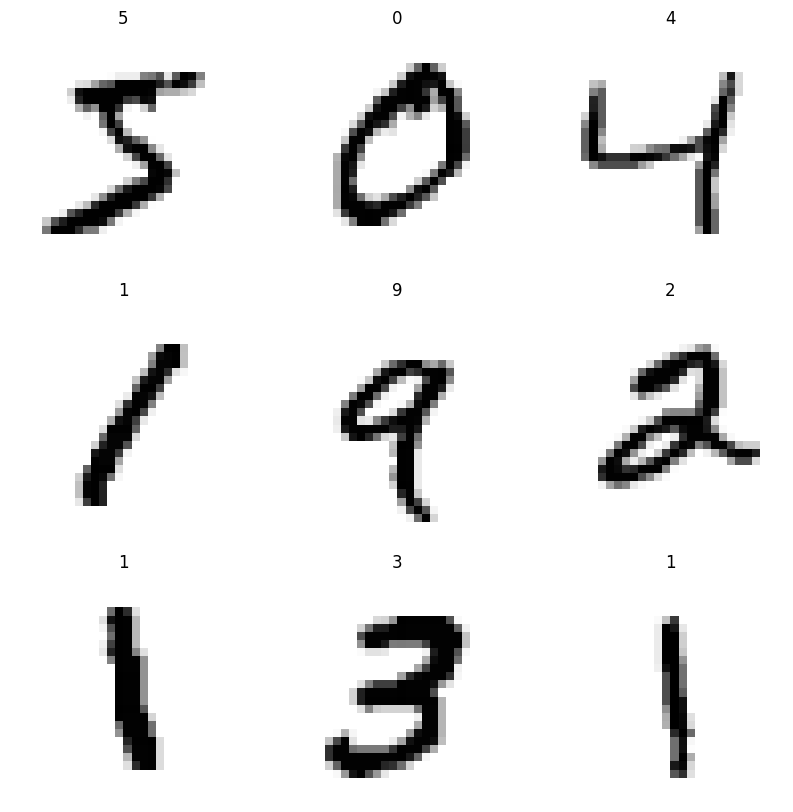

In [3]:
# Let's take a look at a few different samples
fig, axes = plt.subplots(3,3, figsize=(10,10))
for i, ax in enumerate(axes.flat):
    ax.imshow(mnist.data.values[i].reshape(28,28), cmap='gray_r')
    ax.set_title(mnist.target.values[i])
    ax.axis('off')
plt.show()

## PCA

Before we apply PCA to our data, let's make sure we understand it. We will start with some randomly generated points:

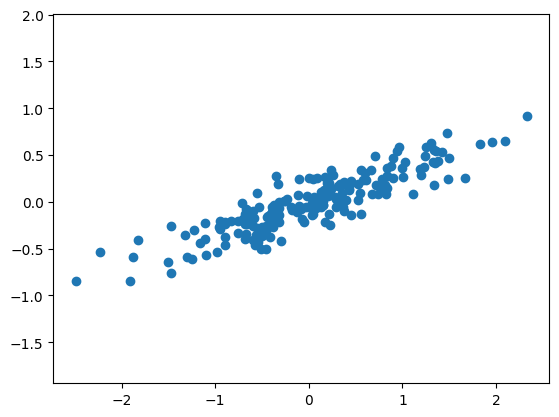

In [4]:
import numpy as np

rng = np.random.RandomState(1) # set the random state for reproducability

X = np.dot(rng.rand(2,2),
           rng.randn(2,200)).T # create synthetic data
plt.scatter(X[:,0],X[:,1]) # plot synthetic data
plt.axis('equal');

Here we have a two dimensional dataset that, by eye, has a nearly linear relationship between the X and Y values. This is reminiscent of the type of data we would look to explore with linear regression, but the problem setting here is slightly different: rather than attempting to predict the y values from the x values, the unsupervised learning problem attempts to learn about the relationship between the x and y values.

In principal component analysis, this relationship is quantified by finding a list of the principal axes in the data, and using those axes to describe the dataset. Using Scikit-Learn's PCA estimator, we can compute this as follows:

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X);

The fit learns some quantities from the data, most importantly the "components" and "explained variance":   

In [6]:
print(f'Components:\n{pca.components_}\n')
print(f'Explained variance: {pca.explained_variance_}')

Components:
[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]

Explained variance: [0.7625315 0.0184779]


To see what these numbers mean, let's visualize them as vectors over the input data, using the "components" to define the direction of the vector, and the "explained variance" to define the squared-length of the vector:

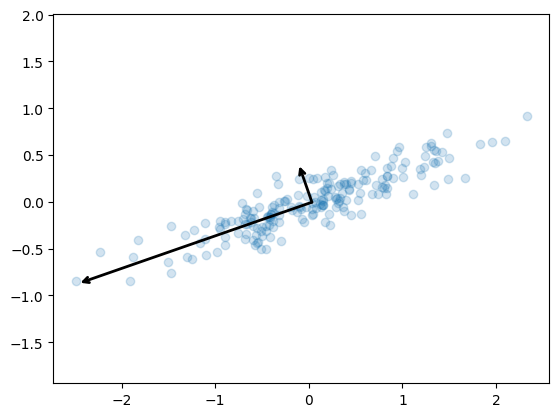

In [7]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0, color='black')
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

These vectors represent the principal axes of the data, and the length of the vector is an indication of how "important" that axis is in describing the distribution of the data—more precisely, it is a measure of the variance of the data when projected onto that axis. The projection of each data point onto the principal axes are the "principal components" of the data.

You have likely noticed that in this example, almost all of the variance is explained by the first axis, while the second axis explains very little variance. This is where PCA becomes a tool for dimensionality reduction. By transforming the data to lie along the PCA dimensions and then only keeping the first K dimensions, we can reduce our dataset into K dimensional space:

original shape:    (200, 2)
transformed shape: (200, 1)


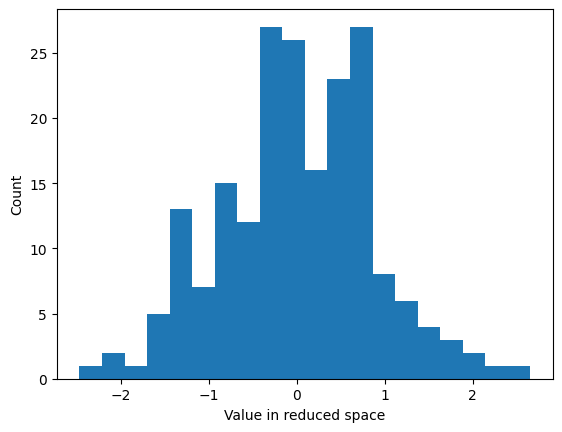

In [8]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)
plt.hist(X_pca,bins=20)
plt.xlabel('Value in reduced space')
plt.ylabel('Count');

If we project our new, low-dimensional data back into the original space, we can get a good visual intuition of what PCA has done for us:

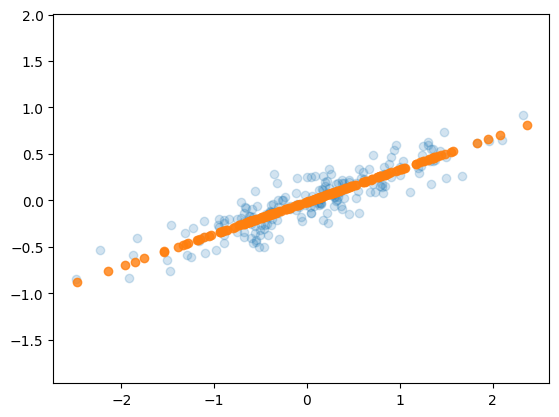

In [9]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

The light points are the original data, while the orange points are the projected version. This makes clear what a PCA dimensionality reduction means: the information along the least important principal axis or axes is removed, leaving only the component(s) of the data with the highest variance. The fraction of variance that is cut out (proportional to the spread of points about the line formed in this figure) is roughly a measure of how much "information" is discarded in this reduction of dimensionality.

This reduced-dimension dataset is in some senses "good enough" to encode the most important relationships between the points: despite reducing the dimension of the data by 50%, the overall relationship between the data points are mostly preserved.

The usefulness of the dimensionality reduction may not be entirely apparent in only two dimensions, but becomes much more clear when looking at high-dimensional data. To see this, let's now look at applying PCA to our digits.

**Your Turn**

The code above shows how to create a PCA model and apply it to a dataset. Now, apply PCA to the MNIST dataset, reducing the dimensionality to 2 dimensions. Then, use the method supplied below to plot your results. What do you see?

original shape:    (70000, 784)
transformed shape: (70000, 2)


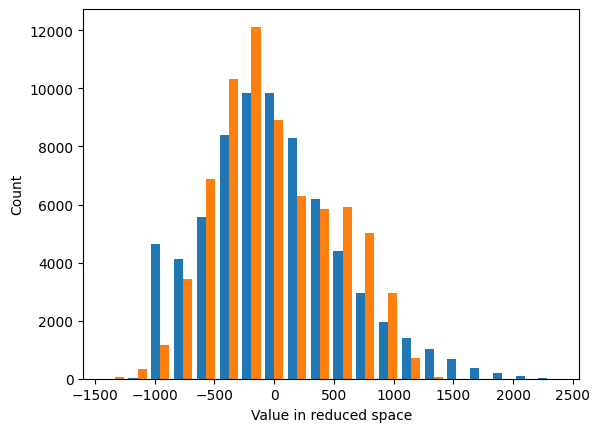

In [17]:
import seaborn as sns

def plot_digits(data, target):
    if data.shape[1] > 2:
        raise ValueError("Data has more than 2 dimensions - PCA must be applied first")
    plt.figure(figsize=(12,12))
    sns.scatterplot(x=data[:,0], y=data[:,1], hue=target, palette='nipy_spectral')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.title('2D PCA of MNIST Dataset')
    plt.show()

# ======= Your code here ========

# Make sure to apply PCA to the MNIST dataset and then plot the results using the function above
pca = PCA(n_components=2)
pca.fit(mnist.data)
mnist_pca = pca.transform(mnist.data)
print("original shape:   ", mnist.data.shape)
print("transformed shape:", mnist_pca.shape)
plt.hist(mnist_pca,bins=20)
plt.xlabel('Value in reduced space')
plt.ylabel('Count');

## Plot results
plot_digits(mnist_pca, mnist.target)

# ================================

## t-SNE

We are now going to look at a different method of dimensionality reduction: t-SNE, a method partially developed here at U of T by Geoffrey Hinton in 2008. It differs from PCA in that it uses the _local relationships_ between points to create a low-dimensional mapping. Among other things, this allows t-SNE to capture non-linear structures in the data.

There are a number of other benefits to t-SNE over PCA, but since we are focusing on using dimensionality reduction for visualization we will stick to the benefits which are apparent in that space. Because t-SNE considers the local relationships between points, it ensures that the distances between points in the low dimensional mapping are representative of the distances in the original space. This makes it a lot more useful for visualization compared to PCA!

t-SNE – at a high level – basically works like this:

Step 1: In the high-dimensional space, create a probability distribution that dictates the relationships between various neighboring points

Step 2: It then tries to recreate a low dimensional space that follows that probability distribution as best as possible.

The “t” in t-SNE comes from the t-distribution, which is the distribution used in Step 2. The “S” and “N” (“stochastic” and “neighbor”) come from the fact that it uses a probability distribution across neighboring points.

Let's apply t-SNE to the MNIST dataset and see how it compares to PCA. One thing to note about t-SNE is that it's much, much slower than PCA. We will time our execution to get a sense of what that looks like in practice.

In [18]:
from time import time

In [19]:
# Compute PCA from before, for comparison
t0 = time()
X_pca = PCA(n_components=2).fit_transform(mnist.data.values)
print(f'PCA done in {time()-t0:.4f} seconds')

PCA done in 5.2110 seconds


Because I don't want you to have to run this over and over again if you restart the notebook, we are going to write some code that will save your results on completion (and try to load that back up if it exists). This way, you can just run the t-SNE code once and then play around with the results as much as you want.

In [20]:
from pathlib import Path

tsne_path = Path('tsne.npy') # path to save t-SNE results

In [33]:
# Compute t-SNE

# Downsample 1/30th
mnist_data_downsampled = mnist.data[::30]

if tsne_path.exists(): # if the file exists, load it
    X_tsne = np.load(tsne_path)
else: # otherwise, compute it
    from sklearn.manifold import TSNE
    t0 = time()
    X_tsne = TSNE(
        n_components=2,
        verbose=1,
        n_jobs=-1 # use all CPU cores
    ).fit_transform(mnist_data_downsampled)
    print(f't-SNE done in {time()-t0:.4f} seconds')
    np.save(tsne_path, X_tsne)

Now that t-SNE is done, let's plot the results and see how it compares to PCA:

In [39]:
fig, axes = plt.subplots(1,2, figsize=(20,10))

sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=mnist.target.values, palette='nipy_spectral', ax=axes[0])
axes[0].set_title('2D PCA of MNIST Dataset')
axes[0].set_xlabel('First Principal Component')
axes[0].set_ylabel('Second Principal Component')

sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=mnist.target[::30], palette='nipy_spectral', ax=axes[1])
axes[1].set_title('2D t-SNE of MNIST Dataset')
axes[1].set_xlabel('First t-SNE Component')
axes[1].set_ylabel('Second t-SNE Component')

plt.show()

You should be able to see that t-SNE has done a much better job of separating the different classes of digits compared to PCA. This is because t-SNE is able to capture the non-linear relationships between the points, while PCA is only able to capture the linear relationships.

## UMAP

UMAP is another dimensionality reduction technique that is similar to t-SNE, but is generally faster and has some other benefits. It is also able to capture non-linear relationships between points, and is generally considered to be a good alternative to t-SNE.

UMAP differs from t-SNE in that it tries to optimize structure based on a graph representation of the data, rather than a probability distribution. This allows UMAP to be more scalable and generally faster than t-SNE.

Let's apply UMAP to the MNIST dataset and see how it compares to PCA and t-SNE. You'll need to install the UMAP library first:

In [40]:
!pip install -U umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 6.0 MB/s eta 0:00:00


In [43]:
from umap import UMAP

t0 = time()
# ========= YOUR TURN ==========
X_umap = UMAP(n_components=2).fit_transform(mnist.data.values)
# ==============================
print(f'UMAP done in {time()-t0:.4f} seconds')

UMAP done in 122.4787 seconds


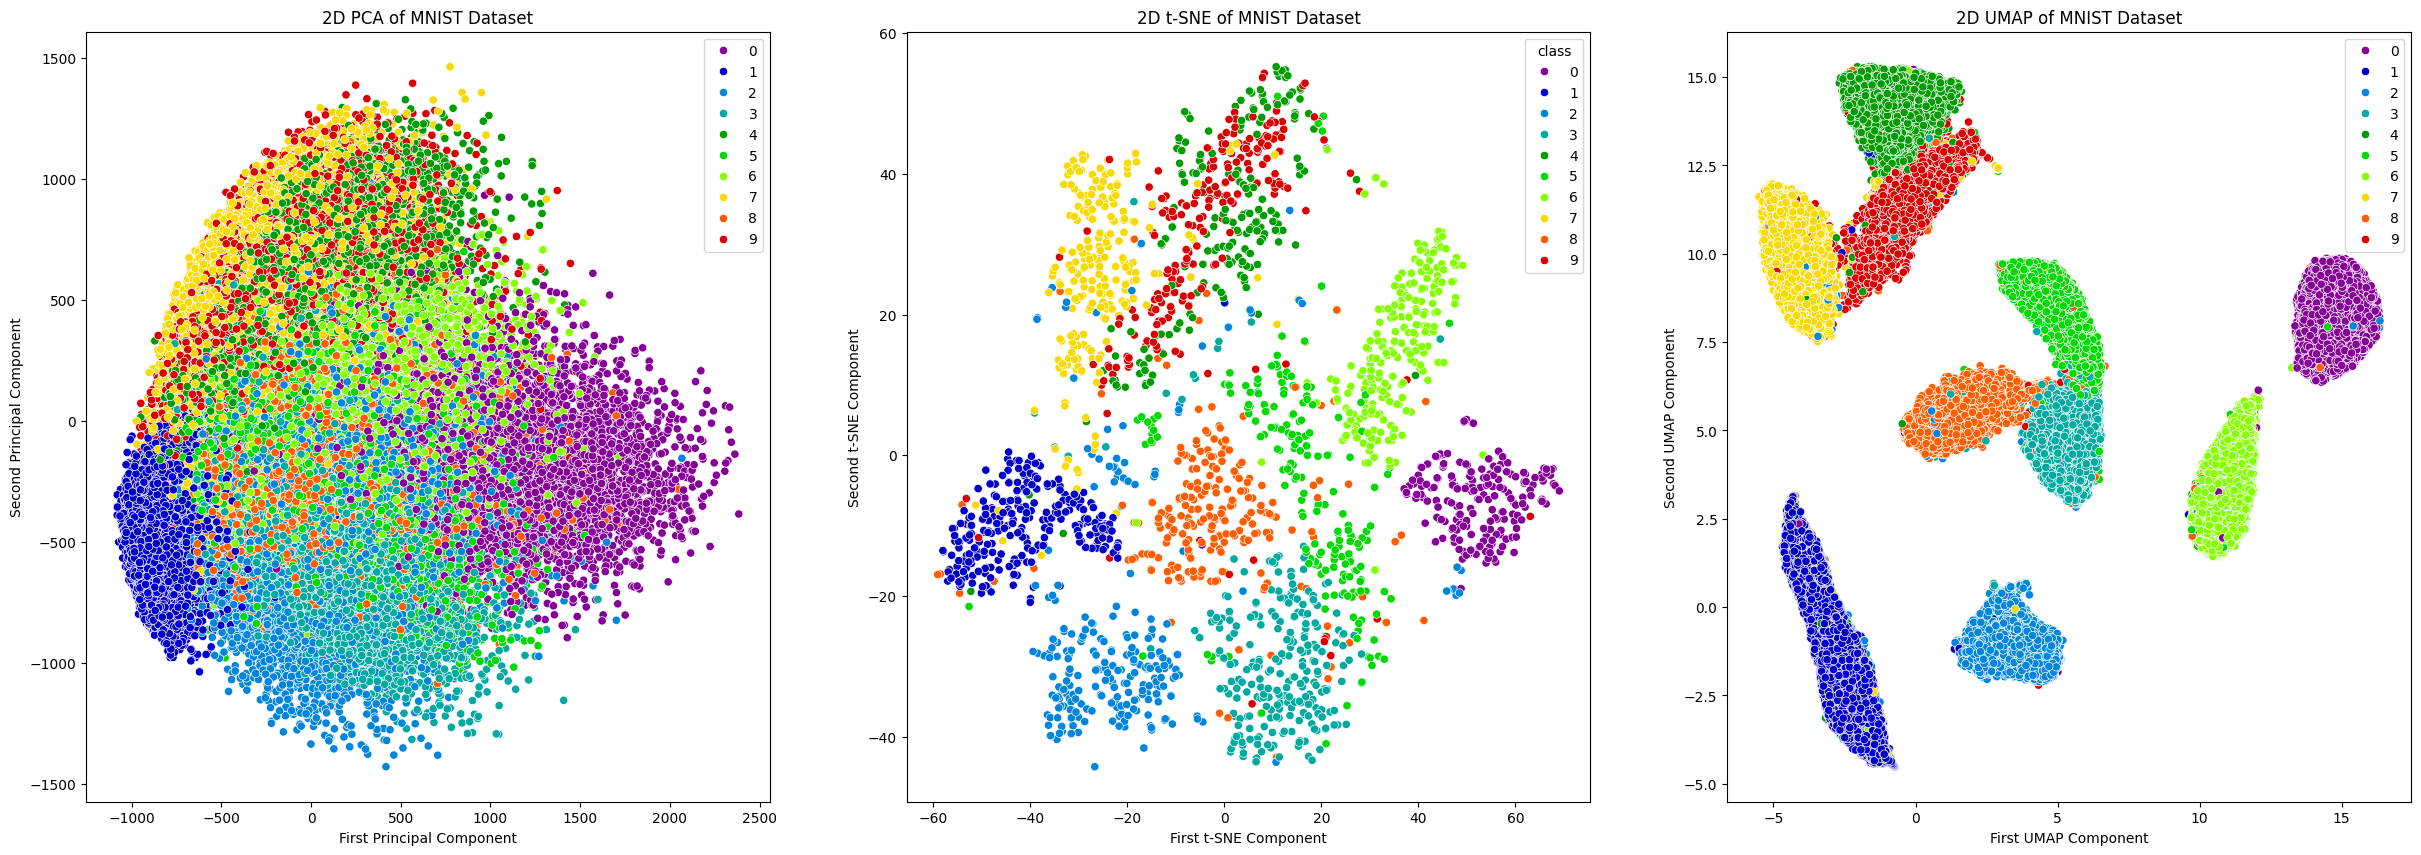

In [44]:
fig, axes = plt.subplots(1,3, figsize=(30,10))

sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=mnist.target.values, palette='nipy_spectral', ax=axes[0])
axes[0].set_title('2D PCA of MNIST Dataset')
axes[0].set_xlabel('First Principal Component')
axes[0].set_ylabel('Second Principal Component')

sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=mnist.target[::30], palette='nipy_spectral', ax=axes[1])
axes[1].set_title('2D t-SNE of MNIST Dataset')
axes[1].set_xlabel('First t-SNE Component')
axes[1].set_ylabel('Second t-SNE Component')

sns.scatterplot(x=X_umap[:,0], y=X_umap[:,1], hue=mnist.target.values, palette='nipy_spectral', ax=axes[2])
axes[2].set_title('2D UMAP of MNIST Dataset')
axes[2].set_xlabel('First UMAP Component')
axes[2].set_ylabel('Second UMAP Component')

plt.show()

You should see that UMAP has done a good job of separating the different classes of digits, similar to t-SNE. UMAP is generally faster than t-SNE, so it is a good alternative when you have a large dataset.

## Bonus: Visualizing high-dimensional data using autoencoders

Looking ahead to later in the course, we will learn about autoencoders, which are a type of neural network that can be used for dimensionality reduction. Autoencoders are able to capture non-linear relationships between points, similar to t-SNE and UMAP.

An autoencoder is comprised of two parts: an encoder and a decoder. The encoder takes the high-dimensional data and maps it to a lower-dimensional space, while the decoder takes the lower-dimensional data and maps it back to the high-dimensional space. The goal of the autoencoder is to minimize the difference between the input data and the output data.

You can think of this as trying to compress the data into a lower-dimensional space, and then reconstructing the data from that lower-dimensional space. This is similar to PCA, but autoencoders are able to capture non-linear relationships between points, like t-SNE and UMAP.

Let's build a very simple autoencoder using Keras and apply it to the MNIST dataset. We will use a 2-layer neural network for the encoder and a 2-layer neural network for the decoder. We will then use the encoder to map the data to a 2-dimensional space, and plot the results.

In [45]:
from tensorflow.keras import layers, models

# Build the autoencoder
encoder = models.Sequential([
    layers.Input(shape=(784,)), # 28x28 input = 784
    layers.Dense(128, activation='relu'),
    layers.Dense(2, activation=None) # 2-dimensional "output"
])

decoder = models.Sequential([
    layers.Input(shape=(2,)), # Take in the 2-dimensional output from the encoder
    layers.Dense(128, activation='relu'),
    layers.Dense(784, activation='sigmoid') # Reconstruct the 784-dimensional input
])

autoencoder = models.Sequential([
    encoder,
    decoder
])

autoencoder.compile(optimizer='adam', loss='mae')

In [46]:
# Train the autoencoder
autoencoder.fit(
    mnist.data.values/255, mnist.data.values/255, # input and output are the same - scaled to [0,1]
    epochs=10,
    batch_size=128
)

Epoch 1/10
547/547 [==============================] - 6s 9ms/step - loss: 0.1288
Epoch 2/10
547/547 [==============================] - 8s 15ms/step - loss: 0.1121
Epoch 3/10
547/547 [==============================] - 5s 9ms/step - loss: 0.1060
Epoch 4/10
547/547 [==============================] - 6s 11ms/step - loss: 0.1030
Epoch 5/10
547/547 [==============================] - 5s 9ms/step - loss: 0.1017
Epoch 6/10
547/547 [==============================] - 6s 11ms/step - loss: 0.1007
Epoch 7/10
547/547 [==============================] - 5s 9ms/step - loss: 0.1000
Epoch 8/10
547/547 [==============================] - 5s 9ms/step - loss: 0.0993
Epoch 9/10
547/547 [==============================] - 6s 11ms/step - loss: 0.0984
Epoch 10/10
547/547 [==============================] - 5s 9ms/step - loss: 0.0977


In [47]:
# Use the encoder to map the data to 2-dimensional space
X_autoencoder = encoder.predict(mnist.data.values/255)

2188/2188 [==============================] - 5s 2ms/step


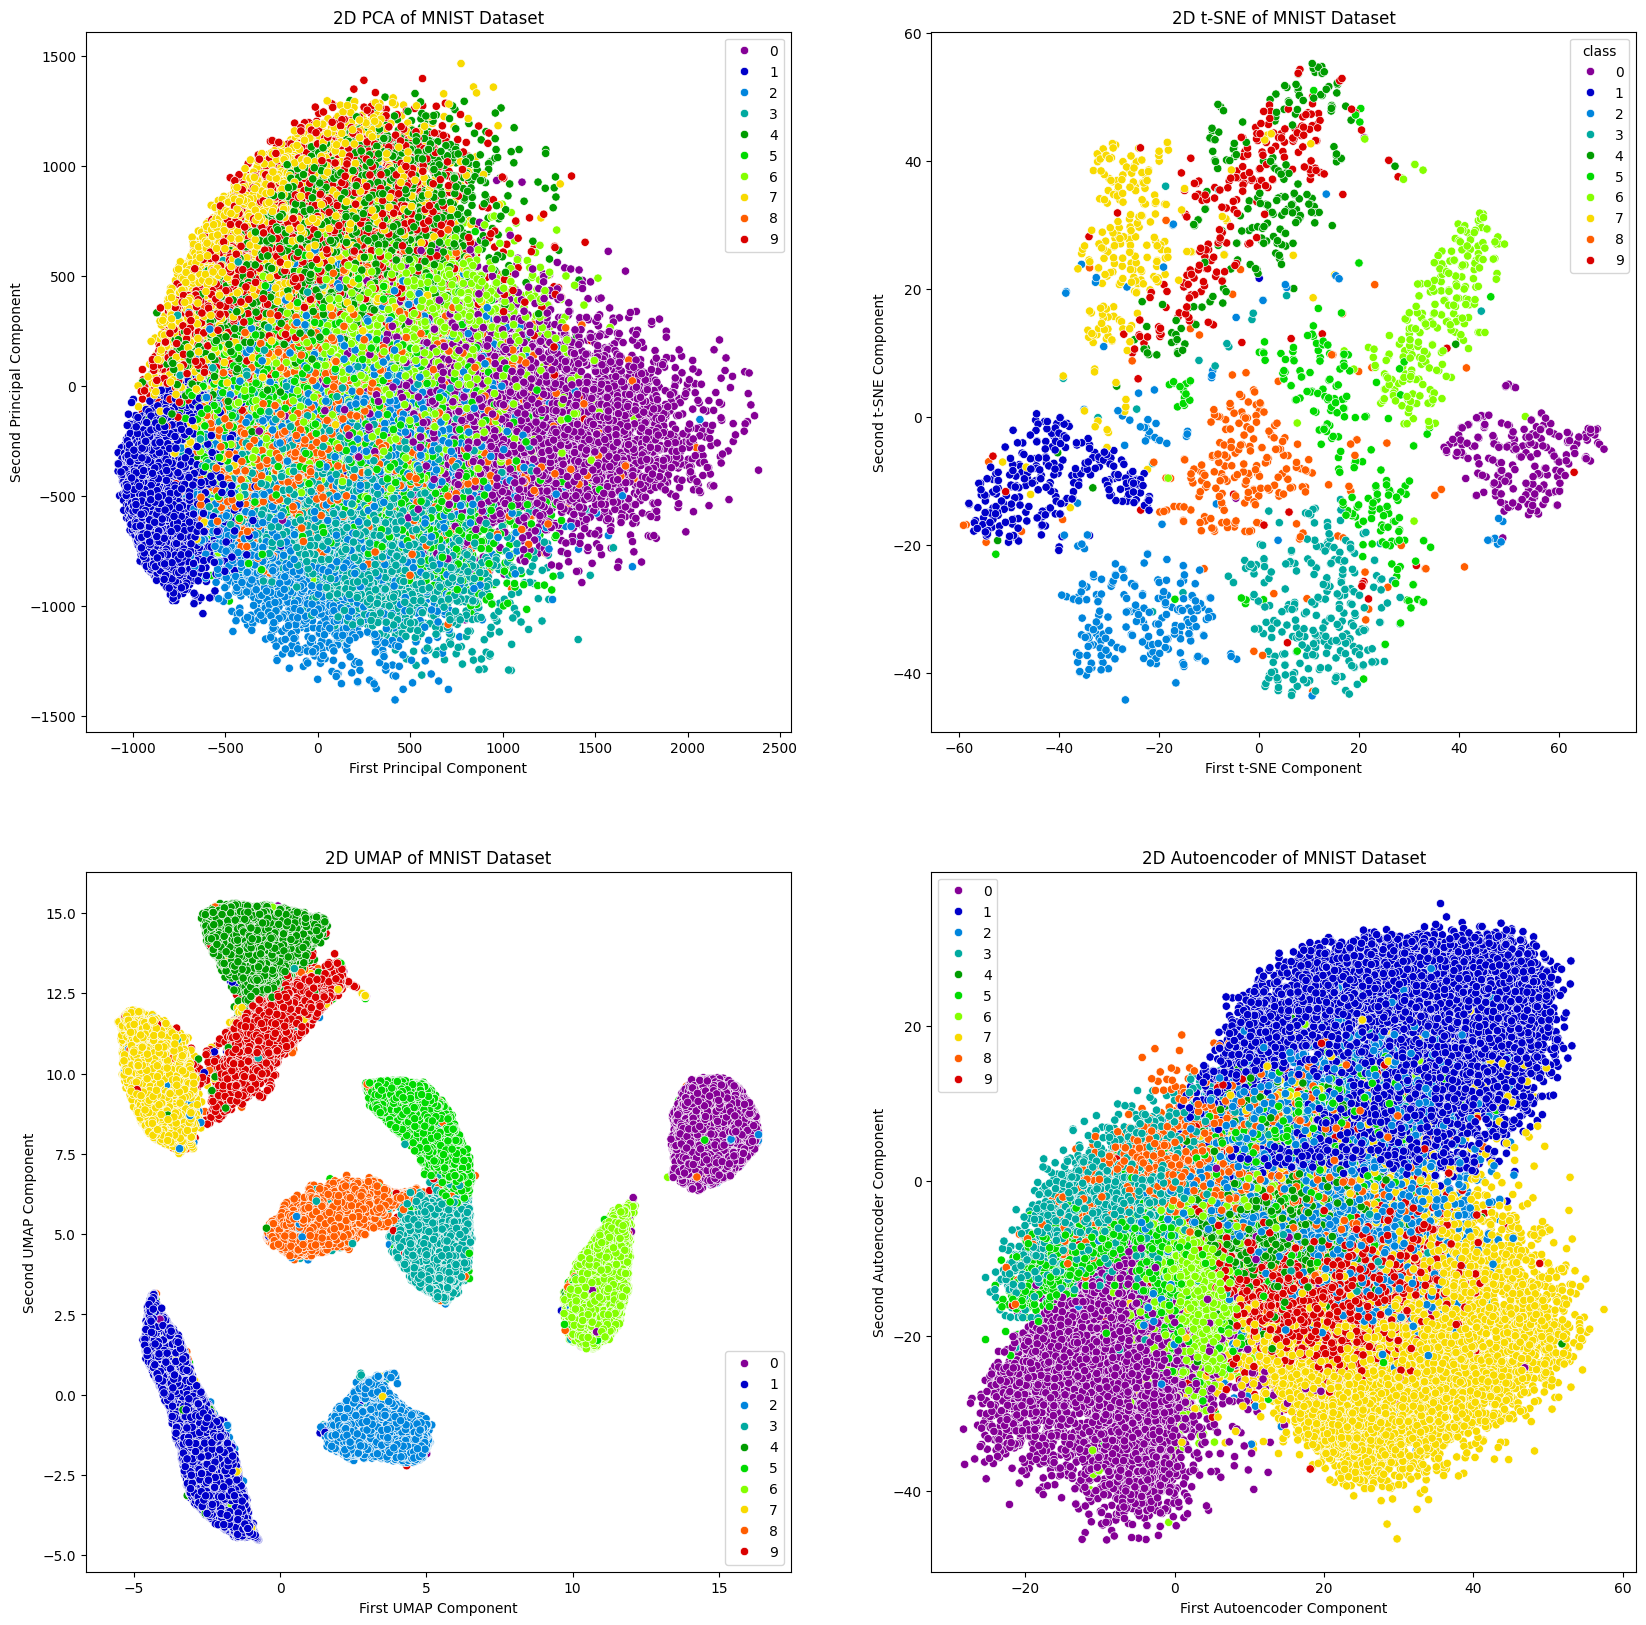

In [49]:
# Plot the results
fig, ax = plt.subplots(2,2, figsize=(20,20))

sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=mnist.target.values, palette='nipy_spectral', ax=ax[0,0])
ax[0,0].set_title('2D PCA of MNIST Dataset')
ax[0,0].set_xlabel('First Principal Component')
ax[0,0].set_ylabel('Second Principal Component')

sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=mnist.target[::30], palette='nipy_spectral', ax=ax[0,1])
ax[0,1].set_title('2D t-SNE of MNIST Dataset')
ax[0,1].set_xlabel('First t-SNE Component')
ax[0,1].set_ylabel('Second t-SNE Component')

sns.scatterplot(x=X_umap[:,0], y=X_umap[:,1], hue=mnist.target.values, palette='nipy_spectral', ax=ax[1,0])
ax[1,0].set_title('2D UMAP of MNIST Dataset')
ax[1,0].set_xlabel('First UMAP Component')
ax[1,0].set_ylabel('Second UMAP Component')

sns.scatterplot(x=X_autoencoder[:,0], y=X_autoencoder[:,1], hue=mnist.target.values, palette='nipy_spectral', ax=ax[1,1])
ax[1,1].set_title('2D Autoencoder of MNIST Dataset')
ax[1,1].set_xlabel('First Autoencoder Component')
ax[1,1].set_ylabel('Second Autoencoder Component')

plt.show()

There you have it - four different approaches to dimensionality reduction. PCA is the simplest and fastest, but is only able to capture linear relationships between points. t-SNE and UMAP are able to capture non-linear relationships, but are slower than PCA. Autoencoders are also able to capture non-linear relationships, but are generally slower than t-SNE and UMAP.

Now that we did this, I am going to try it on the HCC data: